# Purpose of the notebook

- Think of rasterio as numpy array 
- Identify the coordinates of a specific pixel
- Extract the band's value of a specific pixel

In [2]:
import os
os.getcwd()

'/Users/wentingjiang'

In [3]:
os.chdir('/Users/wentingjiang/Downloads/Satellite_image')

## Read data from one image

In [4]:
from __future__ import division
import math
import rasterio # everything in rasterio is represented in numpy array

# the image has been selected from the website: https://landsatlook.usgs.gov/sentinel2/viewer.html
image_file = "17-Dec-2016.tif"

satdat = rasterio.open(image_file) 

In [5]:
# find out about the bounding box: coordinates for each corner in the picture
print(satdat.bounds) 

BoundingBox(left=-9272688.798052965, bottom=950232.7936531055, right=-9245068.126433495, top=963112.4329191403)


In [6]:
# Get dimensions, in map units (using the example GeoTIFF, that's meters)
# to detemrine the surface area

width_in_projected_units = satdat.bounds.right - satdat.bounds.left
height_in_projected_units = satdat.bounds.top - satdat.bounds.bottom

print("Width: {}, Height: {}".format(width_in_projected_units, height_in_projected_units))

Width: 27620.6716194693, Height: 12879.639266034821


In [7]:
# Number of rows and columns. (find # of pixes in width and height)

print("Rows: {}, Columns: {}".format(satdat.height, satdat.width))

Rows: 429, Columns: 920


In [8]:
# This dataset's projection uses meters as distance units.
# find out how many meters are there in a pixel?

xres = (satdat.bounds.right - satdat.bounds.left) / satdat.width
yres = (satdat.bounds.top - satdat.bounds.bottom) / satdat.height

print(xres, yres)
print("Are the pixels square: {}".format(xres == yres))

30.022469151597065 30.02246915159632
Are the pixels square: False


## Extract info about the bands

In [166]:
# The dataset reports a band count.
print(satdat.count)

# And provides a sequence of band indexes.  These are one indexing, not zero indexing like Numpy arrays.
print(satdat.indexes) # index starts at 1 instead of 0

# Band order: B, G, R

3
(1, 2, 3)


In [13]:
# 3-band band order: BGR

blue, green, red = satdat.read()

# satdat is a 2D array representing row and column in the pic 

In [14]:
print(blue.ndim)

2


In [15]:
# Glimpse at the band's values and datatype.

print(blue)
print(blue.dtype)

[[ 14  14  14 ... 177 180 182]
 [ 14  14  14 ... 181 181 187]
 [ 14  14  14 ... 178 181 184]
 ...
 [133 137 143 ... 138 133 120]
 [139 133 148 ... 135 124 113]
 [140 139 156 ... 128 119 112]]
uint8


#### Important! In a raster dataset, each pixel has a value. Pixels are arranged in a grid, and pixels representing equivalent info have the same value, even if they are not in the same location



## Visualization

In [18]:
from matplotlib import pyplot as plt

In [19]:
# Load the 3 bands into 2d arrays - recall that we previously learned PlanetScope band order is BGRN.
b, g, r = satdat.read()

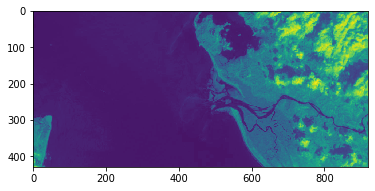

In [20]:
# Use imshow to load the blue band.
fig = plt.imshow(b)

# Display the results.
plt.show()

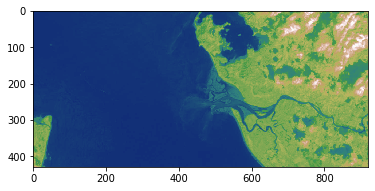

In [21]:
# Plot the green band using a non-default color ramp.
# https://matplotlib.org/users/colormaps.html
fig = plt.imshow(g)
fig.set_cmap('gist_earth')

# Display the results.
plt.show()

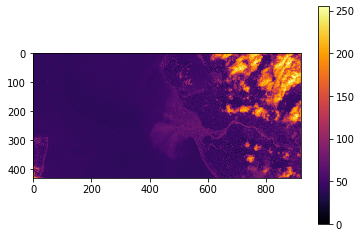

In [22]:

# Plot the red band and add a color bar.

fig = plt.imshow(r)
fig.set_cmap('inferno')
plt.colorbar()

# Display the results.
plt.show()

#### Conclusion: we can see the sediment is clearly visible from the green band image!


## Applying clustering algorithm k-means

In [168]:
g.shape

(429, 920)

In [169]:
g.dtype

dtype('uint8')

In [25]:
g

array([[ 28,  28,  28, ..., 200, 203, 205],
       [ 28,  28,  28, ..., 204, 204, 210],
       [ 28,  28,  28, ..., 200, 203, 207],
       ...,
       [160, 163, 170, ..., 184, 180, 168],
       [169, 162, 178, ..., 183, 174, 163],
       [172, 171, 188, ..., 178, 169, 164]], dtype=uint8)

In [170]:
# narrow down to a small portion of the picture to save computing power

g_small = g[100:300, 450:600]

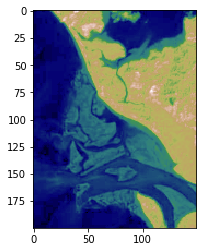

In [171]:
# visualizse
fig = plt.imshow(g_small)
fig.set_cmap('gist_earth')

# Display the results.
plt.show()

In [33]:
flatten_x = g_small.reshape(-1, 1)

In [43]:
g_small_shape = list(g_small.shape)

In [172]:
len(flatten_x)

30000

In [173]:
flatten_x

array([[ 31],
       [ 30],
       [ 30],
       ...,
       [149],
       [144],
       [140]], dtype=uint8)

In [174]:
from sklearn.cluster import KMeans
import numpy as np
X = flatten_x
kmeans = KMeans(n_clusters=6, random_state=0).fit(X)
y_kmeans = kmeans.predict(X)

In [175]:
centers = kmeans.cluster_centers_
print(centers)

[[ 35.54610535]
 [146.38602694]
 [ 89.69344774]
 [ 49.08535403]
 [ 66.2744186 ]
 [129.29014763]]


In [176]:
y_kmeans

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [45]:
g_reshaped = y_kmeans.reshape(g_small_shape)

In [177]:
g_small

array([[ 31,  30,  30, ...,  38,  41,  40],
       [ 32,  31,  31, ...,  36,  36,  37],
       [ 32,  33,  33, ...,  38,  39,  36],
       ...,
       [ 32,  32,  31, ..., 144, 144, 141],
       [ 32,  32,  31, ..., 148, 144, 139],
       [ 31,  31,  31, ..., 149, 144, 140]], dtype=uint8)

In [178]:
g_reshaped

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]], dtype=int32)

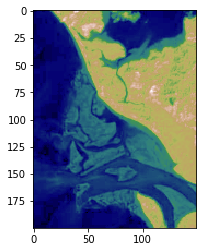

In [179]:
fig = plt.imshow(g_small)
fig.set_cmap('gist_earth')

# Display the results.
plt.show()

In [196]:
temp2 = g_reshaped.copy()
temp2[temp2 != 4] = 0
count_sendiment_2016Dec = np.count_nonzero(temp2 == 4)
print(count_sendiment_2016Dec) 

4945


Text(0.5, 1.0, 'sentiment Dec 2016 - AOI Golfo Dulce, Costa Rica')

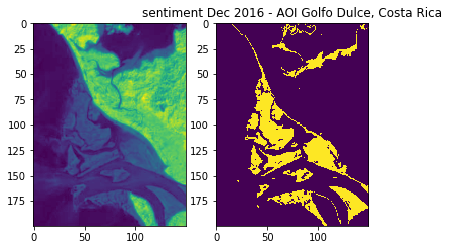

In [185]:
# compare original picture to the classified version

fig, ax = plt.subplots(1,2)
ax[0].imshow(g_small);
ax[1].imshow(temp2);
plt.title("sentiment Dec 2016 - AOI Golfo Dulce, Costa Rica")

## Testing the algo for another pic

In [186]:
# Load another image for testing


# This notebook explores a single 4 band (blue, green, red, NIR) PlanetScope scene in a UTM projection.
image_file2 = "6-Jan-2019.tif"

satdat2 = rasterio.open(image_file2) 

In [187]:
b2, g2, r2 = satdat2.read()

In [188]:
r_small2 = r2[100:300, 450:600]

In [189]:
g_small2 = g2[100:300, 450:600]

In [190]:
flatten_x2 = g_small2.reshape(-1, 1)

In [191]:
y_kmeans2 = kmeans.predict(flatten_x2)

In [192]:
g_reshaped2 = y_kmeans2.reshape(g_small_shape)

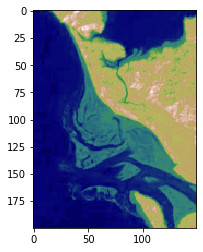

In [193]:
fig = plt.imshow(g_small2)
fig.set_cmap('gist_earth')

# Display the results.
plt.show()

In [200]:
temp1 = g_reshaped2.copy()
temp1[temp1 != 4] = 0
count_sendiment_2019Jan = np.count_nonzero(temp1 == 4)
print(count_sendiment_2019Jan) 

4352


Text(0.5, 1.0, 'sentiment Jan 2019 - AOI Golfo Dulce, Costa Rica')

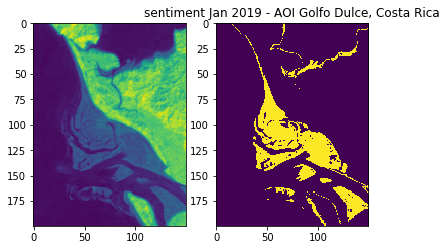

In [198]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(g_small2);
ax[1].imshow(temp1);
plt.title("sentiment Jan 2019 - AOI Golfo Dulce, Costa Rica")

#### The algo showed same result for another pic

## Calculate changes in size of sediment over time

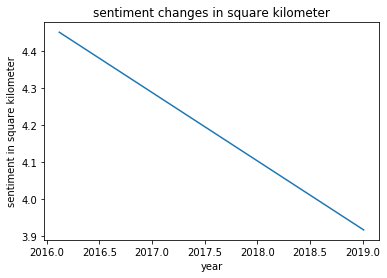

In [199]:
import matplotlib.pyplot as plt

x1 = [2016.12, 2019.01]
y1 = [count_sendiment_2016Dec * 900 /1000000, count_sendiment_2019Jan * 900 /1000000]

plt.xlabel('year')
plt.ylabel('sentiment in square kilometer')

plt.title('sentiment changes in square kilometer')
plt.plot(x1, y1)